## Loan Application Status Prediction

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading data

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\loan_prediction.csv",names=['Loan_ID' ,'Gender' ,'Married' ,'Dependents' ,'Education','Self_Employed' ,'Applicant Income' ,'CoapplicantIncome','Loan_Amount' ,'Loan_Amount_Term','Credit_History' ,'Property_Area' ,'Loan_Status' ])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   Applicant Income   614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
(df.isna().sum()/len(df)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
Applicant Income     0.000000
CoapplicantIncome    0.000000
Loan_Amount          3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
Applicant Income     505
CoapplicantIncome    287
Loan_Amount          203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
obj_col = df.select_dtypes("O").columns.tolist()
int_col = df.select_dtypes(np.number).columns.tolist()

<Axes: xlabel='count', ylabel='Gender'>

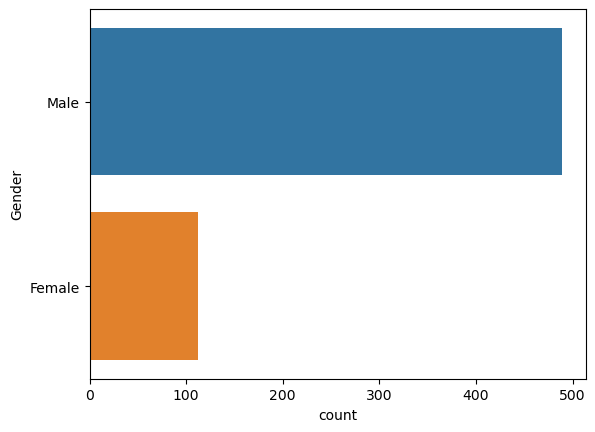

In [9]:
sns.countplot(data=df,y=df["Gender"])

<Axes: xlabel='count', ylabel='Married'>

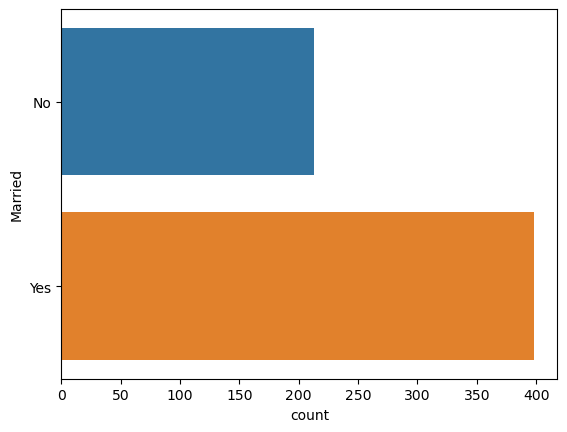

In [10]:
sns.countplot(data=df,y=df["Married"])

<Axes: xlabel='count', ylabel='Dependents'>

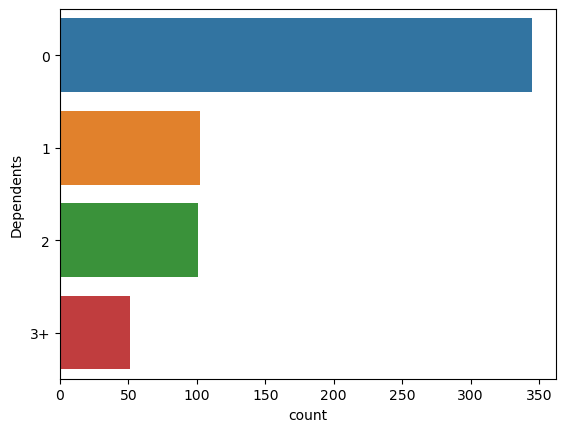

In [11]:
sns.countplot(data=df,y=df["Dependents"])

<Axes: xlabel='count', ylabel='Self_Employed'>

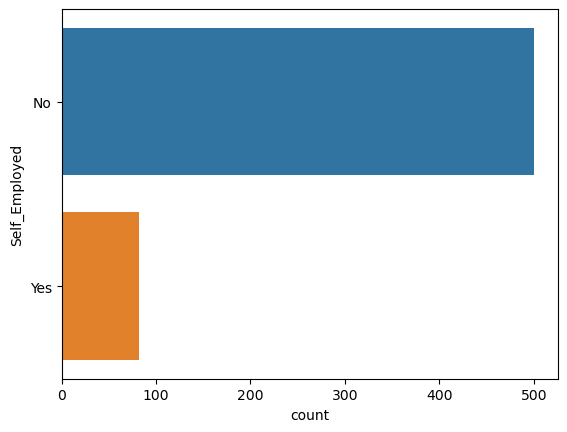

In [12]:
sns.countplot(data=df,y=df["Self_Employed"])

* here more male than female
* Married are more than Unmarried
* most of person are not self maid
* most of pepole are direct apply for loan


**Handaling missing value**

In [13]:
df["Gender"].fillna("Male",inplace=True)
df["Married"].fillna("Yes",inplace=True)
df["Dependents"].fillna("0",inplace=True)
df["Self_Employed"].fillna("No",inplace=True)

**Lebal encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in obj_col:
    df[i] = lb.fit_transform(df[i])

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


handling numerical missing value by knnimputer

In [16]:
from sklearn.impute import KNNImputer

imp = KNNImputer()
df_new = imp.fit_transform(df)

In [17]:
df = pd.DataFrame(df_new,columns=df.columns)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,123.8,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


### Exploratory data analysis

In [18]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.345603,341.902280,0.842671,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.448623,64.513667,0.352021,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,167.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


* CoapplicantIncome,Loan_Amount have large diffrence between Q3 and max value hance there is have some outliers
* CoapplicantIncome have min value and Q1 is 0 it sounds linke invalid

## Removing outliers

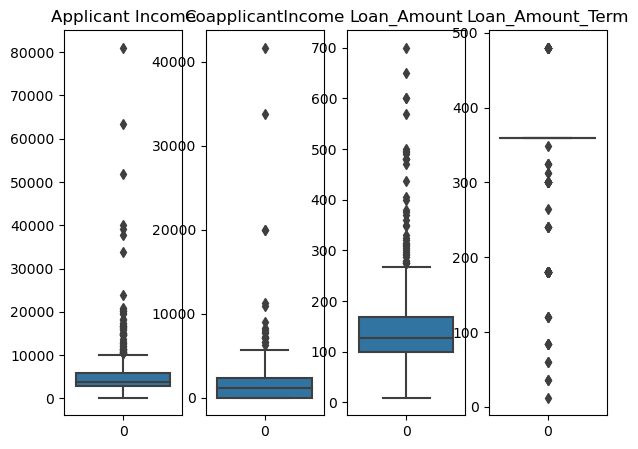

In [19]:
## visualizing oultliers
plt.figure(figsize=(7,5))
num=1
for i in int_col:
    if num<=4:
        plt.subplot(1,4,num)
        sns.boxplot(df[i])
        plt.title(i)
        num +=1
plt.show()

In [20]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.729232,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.264065,0.280754,0.447296,1.223298,0.674519
1,1.723590,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.214873,0.280754,0.447296,1.318513,1.482537
2,1.717948,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.941046,0.280754,0.447296,1.223298,0.674519


In [21]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 284, 308, 313, 333, 333, 369, 402, 409,
        417, 432, 443, 487, 495, 497, 506, 523, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 8, 9, 6,
        8, 8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 9, 8, 9, 7, 9, 7, 8],
       dtype=int64))

In [22]:
df = df[(z<3).all(axis=1)]
df.shape

(577, 13)

##  Removing skweness

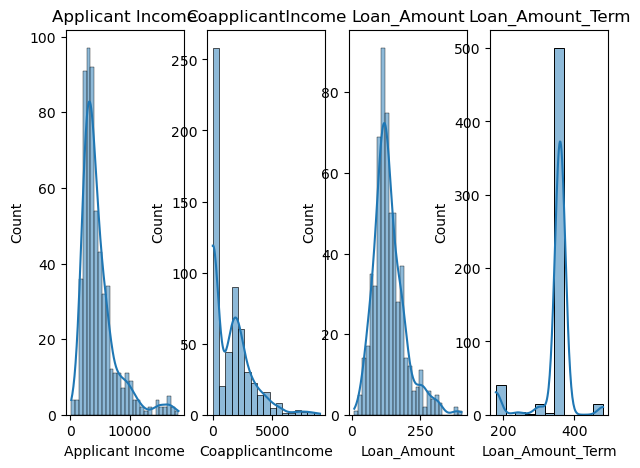

In [23]:
## ckecking skweness
plt.figure(figsize=(7,5))
num=1
for i in int_col:
    if num<=4:
        plt.subplot(1,4,num)
        sns.histplot(df[i],kde=True)
        plt.title(i)
        num +=1
plt.show()

In [24]:
df["Applicant Income"] = np.sqrt(df["Applicant Income"])
df["CoapplicantIncome"] = np.sqrt(df["CoapplicantIncome"])

In [25]:
### Loan_ID has all unique value this is not use in prediction
df.drop("Loan_ID",axis=1,inplace=True)
df.shape

(577, 12)

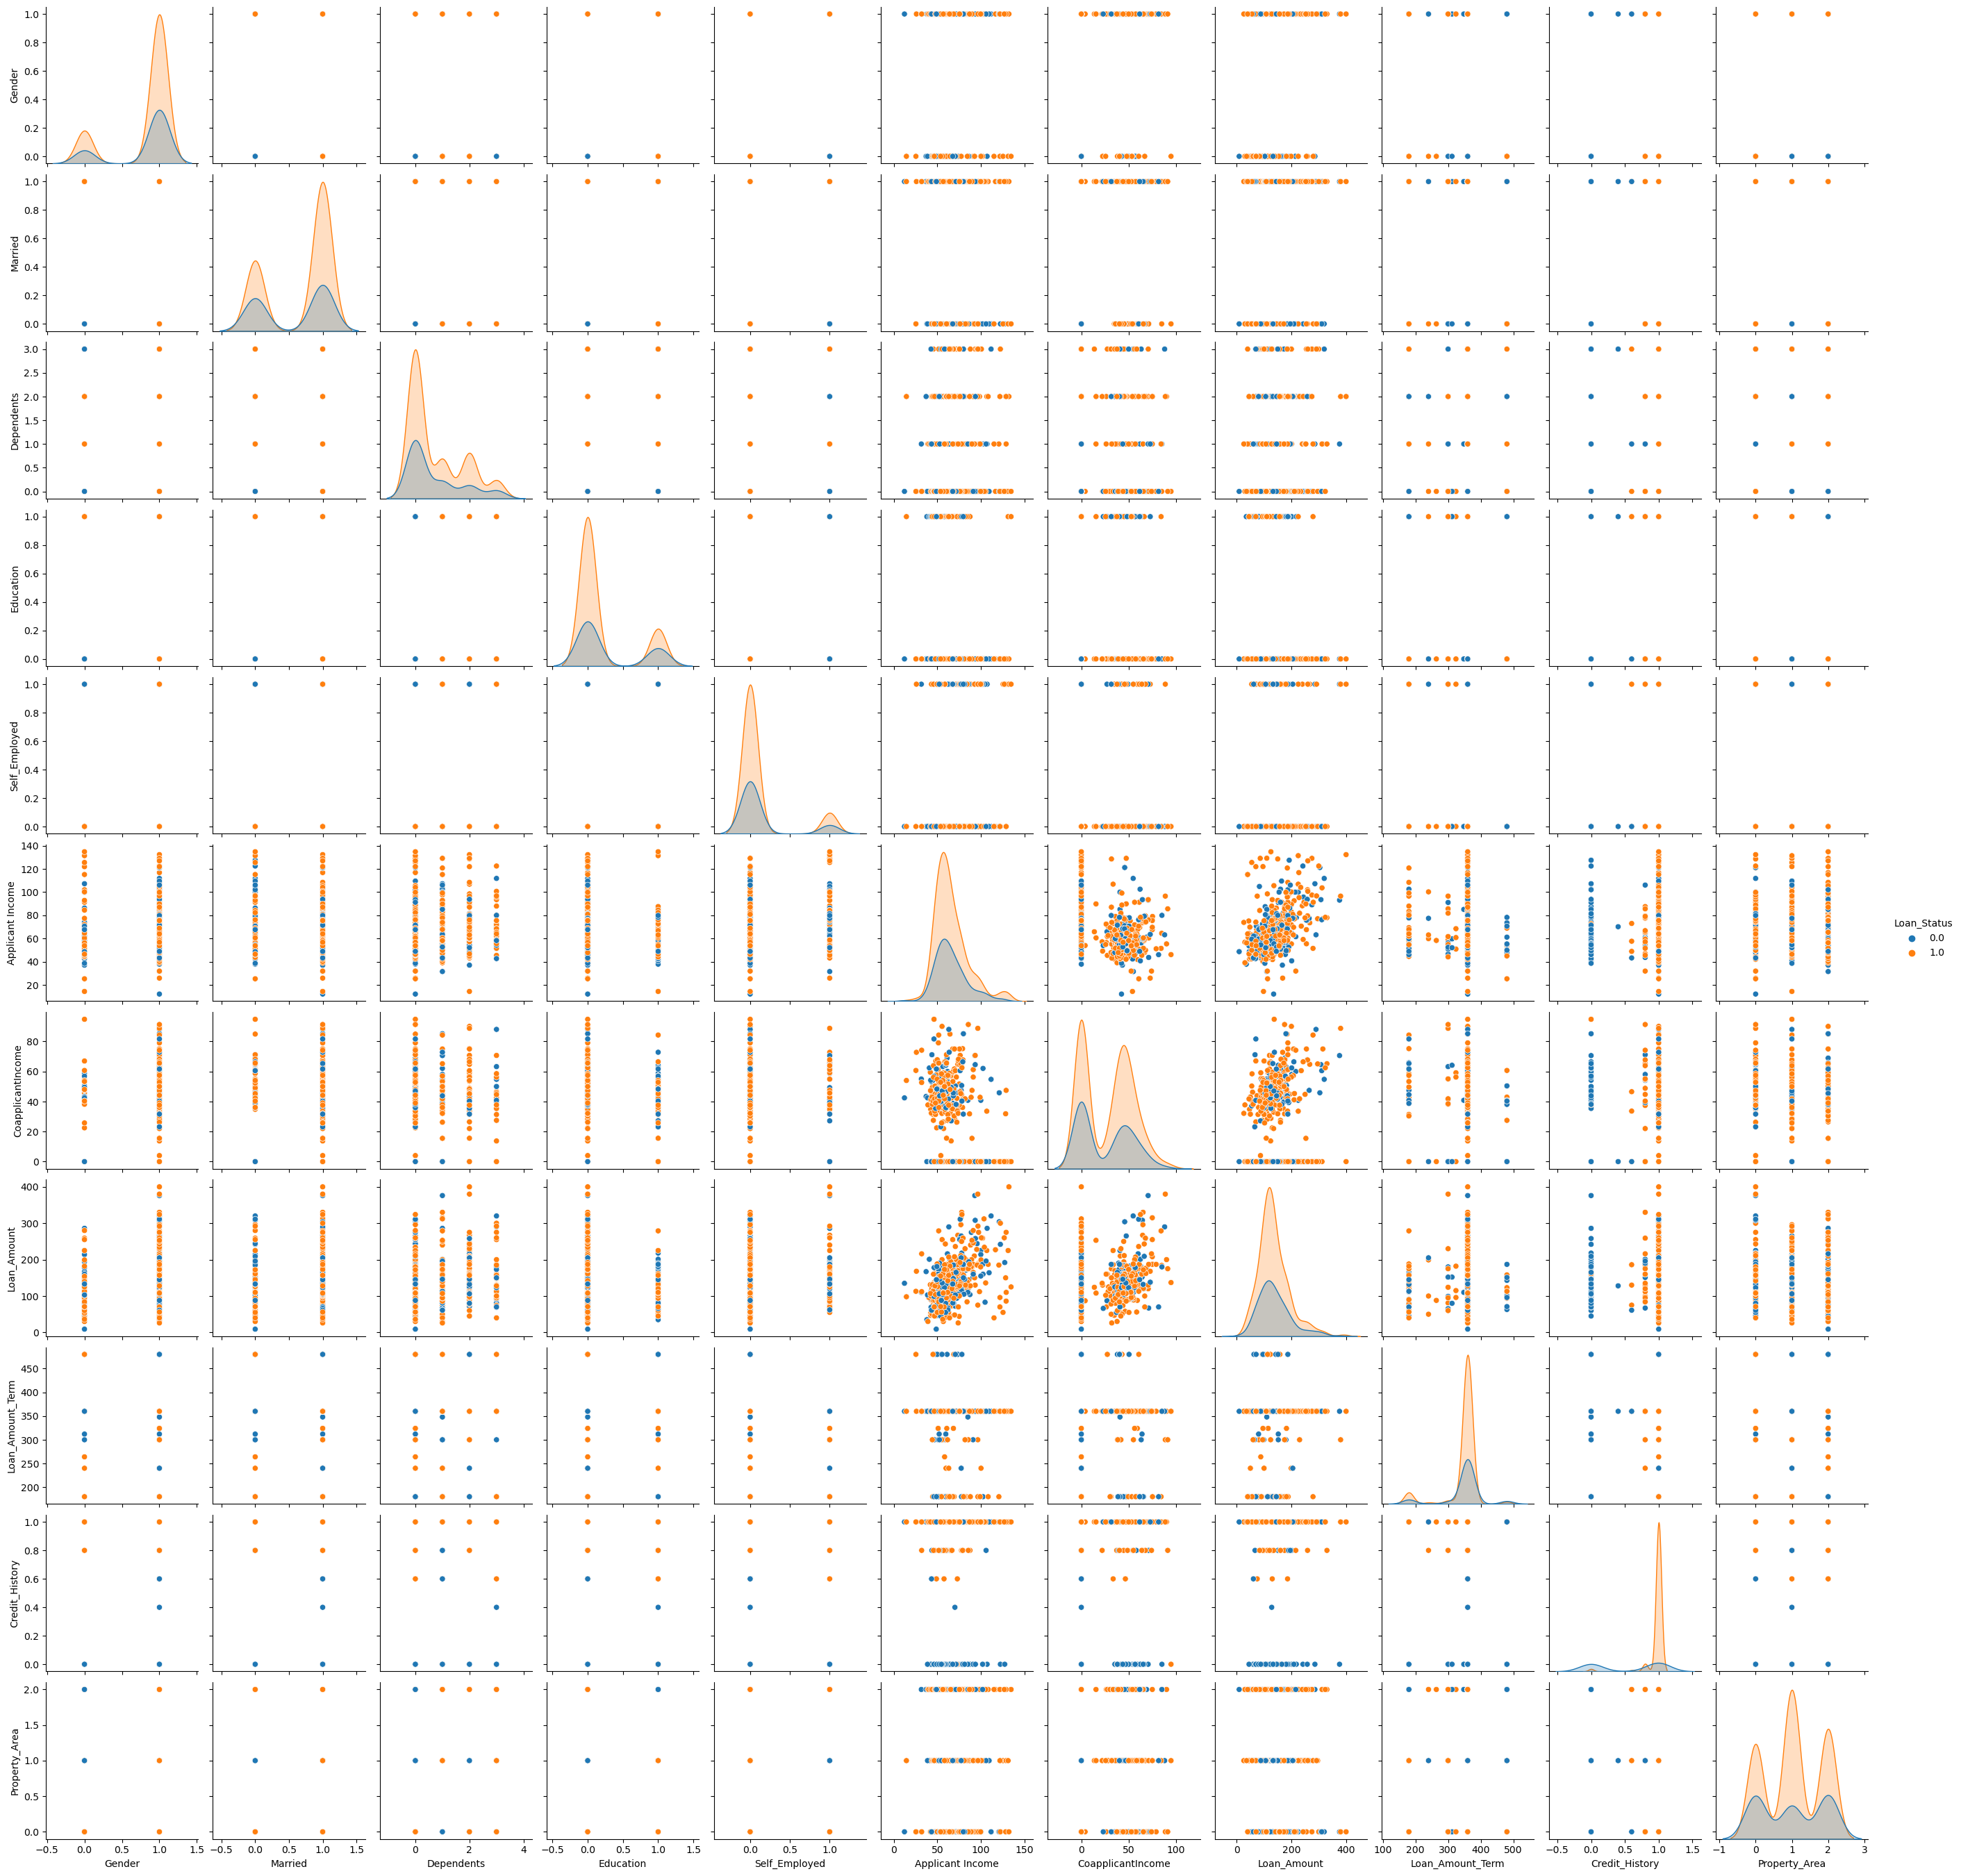

In [26]:
sns.pairplot(df,hue="Loan_Status")

<Axes: >

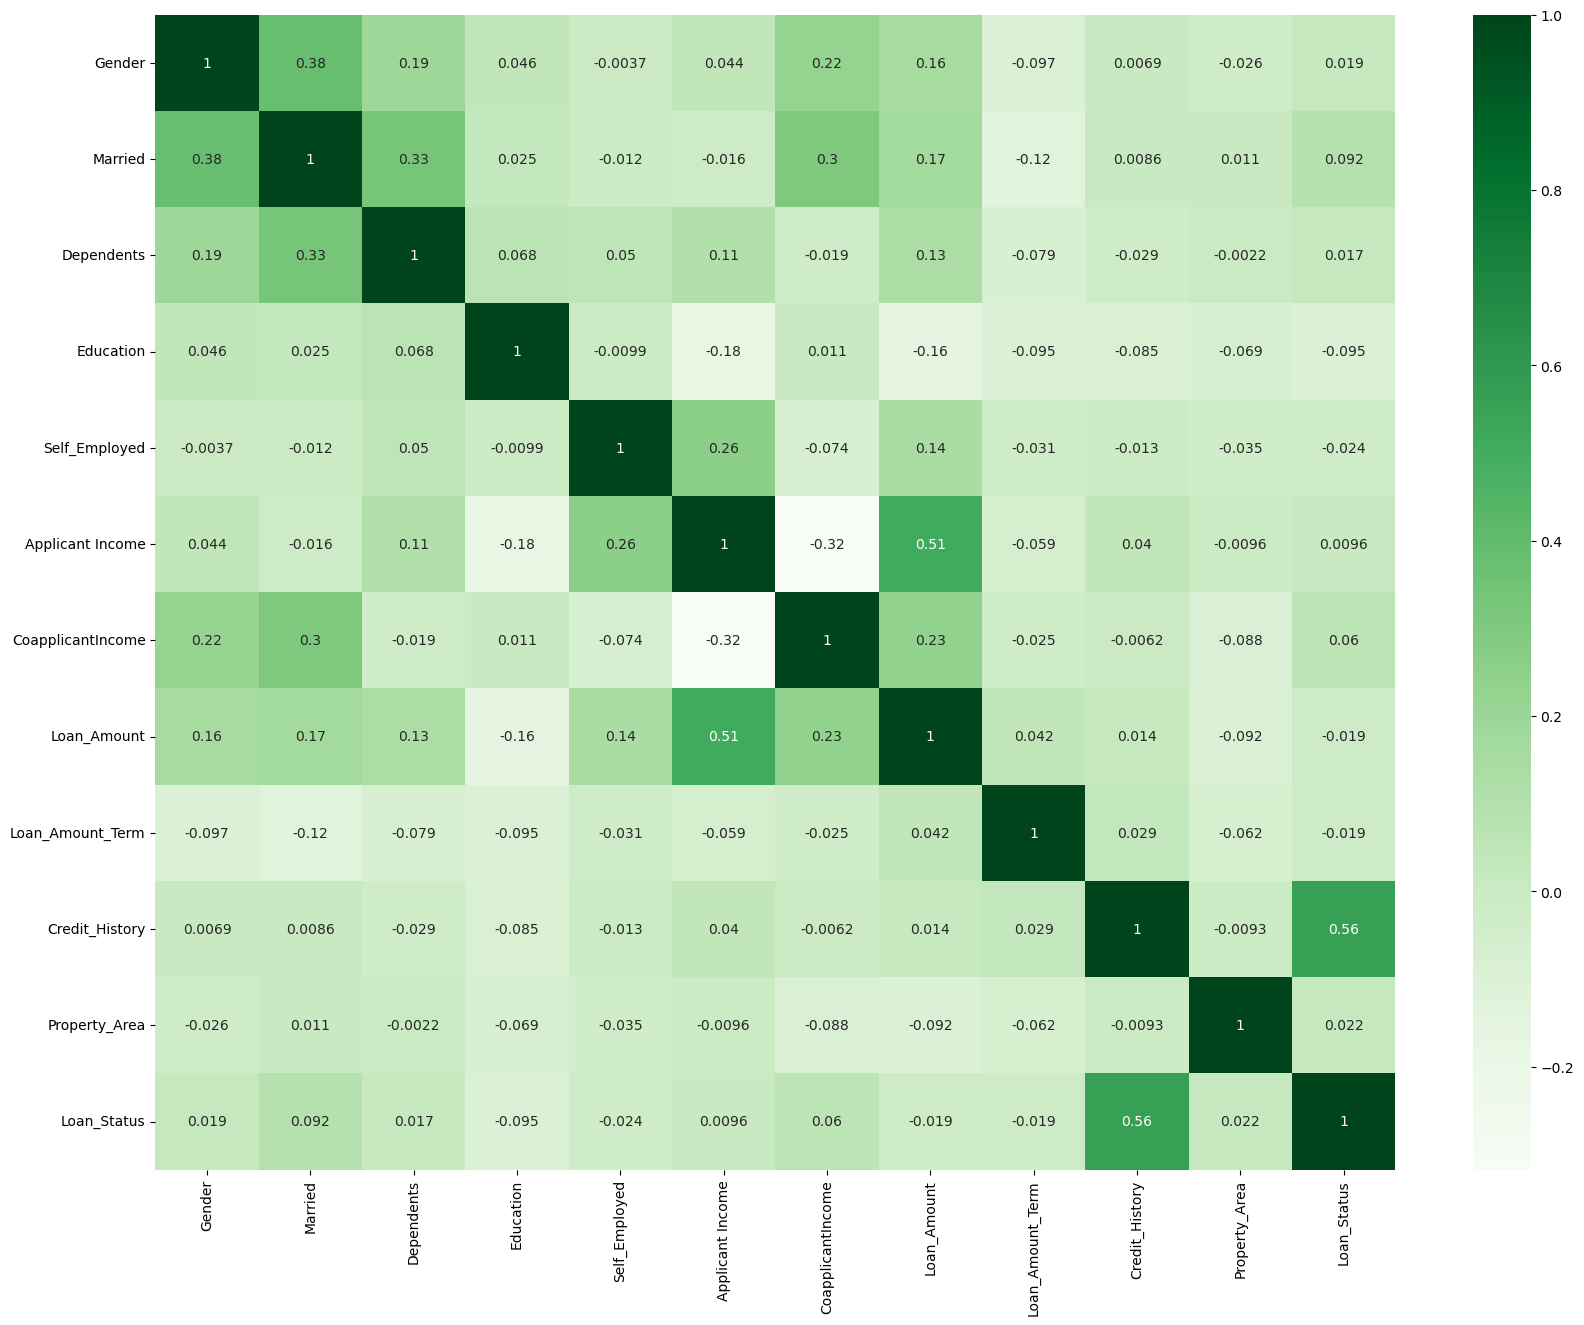

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

* No one feature correleted to each other only Credit_History and loan status is have weak positive correletion

In [28]:
## spliting data into input and target
x = df.drop("Loan_Status",axis=1)
x.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,76.478755,0.000000,123.8,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,67.697858,38.832976,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,54.772256,0.000000,66.0,360.0,1.0,2.0


In [29]:
y= df.loc[:,"Loan_Status"]
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

### Feature selection

In [30]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [31]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [32]:
feature_sel_model.get_support()

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [33]:
selected_feat = x.columns[(feature_sel_model.get_support())]

print("total Feature: {}".format(x.shape[1]))
print('feature selected: {}'.format(len(selected_feat)))

total Feature: 11
feature selected: 9


In [34]:
selected_feat

Index(['Married', 'Dependents', 'Education', 'Applicant Income',
       'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
x = x[selected_feat]
x.head()

,Married,Dependents,Education,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,76.478755,0.000000,123.8,360.0,1.0,2.0
1,1.0,1.0,0.0,67.697858,38.832976,128.0,360.0,1.0,0.0
2,1.0,0.0,0.0,54.772256,0.000000,66.0,360.0,1.0,2.0
3,1.0,0.0,1.0,50.823223,48.559242,120.0,360.0,1.0,2.0
4,0.0,0.0,0.0,77.459667,0.000000,141.0,360.0,1.0,2.0


In [36]:
# Checking multicoliniarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif["ver"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [37]:
vif(x)

,ver,VIF
0,Married,3.583686
1,Dependents,1.784118
2,Education,1.305881
3,Applicant Income,19.192855
4,CoapplicantIncome,3.040012
5,Loan_Amount,11.614635
6,Loan_Amount_Term,16.263561
7,Credit_History,6.276883
8,Property_Area,2.632648


In [38]:
x.drop(["Applicant Income"],axis=1,inplace=True)
vif(x)

,ver,VIF
0,Married,3.558429
1,Dependents,1.779998
2,Education,1.305860
3,CoapplicantIncome,2.465233
4,Loan_Amount,6.944928
5,Loan_Amount_Term,12.200365
6,Credit_History,6.091453
7,Property_Area,2.595211


#### feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler
smt = StandardScaler()

x_new = smt.fit_transform(x)
x = pd.DataFrame(x_new,columns=x.columns)
x.head(3)

,Married,Dependents,Education,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.362511,-0.726089,-0.541961,-1.048379,-0.208863,0.240499,0.453233,1.227472
1,0.733939,0.278595,-0.541961,0.444242,-0.136093,0.240499,0.453233,-1.306522
2,0.733939,-0.726089,-0.541961,-1.048379,-1.210319,0.240499,0.453233,1.227472


#### splting data into train and test

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
print("x_train:",x_train.shape,"|","y_train:",y_train.shape)
print("x_test:",x_test.shape,"|","y_test:",y_test.shape)
print(y_train.value_counts())

x_train: (461, 8) | y_train: (461,)
x_test: (116, 8) | y_test: (116,)
1.0    319
0.0    142
Name: Loan_Status, dtype: int64


In [43]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train,y_train = smt.fit_resample(x_train,y_train)

In [44]:
y_train.value_counts()

1.0    319
0.0    319
Name: Loan_Status, dtype: int64

### Model Building

#### LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [48]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.7366771159874608

confusion_matrix:
 [[190 129]
 [ 39 280]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.83      0.60      0.69       319
         1.0       0.68      0.88      0.77       319

    accuracy                           0.74       638
   macro avg       0.76      0.74      0.73       638
weighted avg       0.76      0.74      0.73       638

<-------------------test------------------------->
accuracy_score: 0.7758620689655172

confusion_matrix:
 [[17 19]
 [ 7 73]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.71      0.47      0.57        36
         1.0       0.79      0.91      0.85        80

    accuracy                           0.78       116
   macro avg       0.75      0.69      0.71       116
weighted avg       0.77      0.78      0.76       116



#### knn

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [52]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.8620689655172413

confusion_matrix:
 [[277  42]
 [ 46 273]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       319
         1.0       0.87      0.86      0.86       319

    accuracy                           0.86       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.86      0.86      0.86       638

<-------------------test------------------------->
accuracy_score: 0.7068965517241379

confusion_matrix:
 [[21 15]
 [19 61]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.53      0.58      0.55        36
         1.0       0.80      0.76      0.78        80

    accuracy                           0.71       116
   macro avg       0.66      0.67      0.67       116
weighted avg       0.72      0.71      0.71       116



#### svc

In [53]:
from sklearn.svm import SVC

In [54]:
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [55]:
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

In [56]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.799373040752351

confusion_matrix:
 [[225  94]
 [ 34 285]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.87      0.71      0.78       319
         1.0       0.75      0.89      0.82       319

    accuracy                           0.80       638
   macro avg       0.81      0.80      0.80       638
weighted avg       0.81      0.80      0.80       638

<-------------------test------------------------->
accuracy_score: 0.8017241379310345

confusion_matrix:
 [[20 16]
 [ 7 73]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.74      0.56      0.63        36
         1.0       0.82      0.91      0.86        80

    accuracy                           0.80       116
   macro avg       0.78      0.73      0.75       116
weighted avg       0.80      0.80      0.79       116



#### RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)

In [60]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.9984326018808778

confusion_matrix:
 [[319   0]
 [  1 318]]

classification_report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       319
         1.0       1.00      1.00      1.00       319

    accuracy                           1.00       638
   macro avg       1.00      1.00      1.00       638
weighted avg       1.00      1.00      1.00       638

<-------------------test------------------------->
accuracy_score: 0.75

confusion_matrix:
 [[21 15]
 [14 66]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.60      0.58      0.59        36
         1.0       0.81      0.82      0.82        80

    accuracy                           0.75       116
   macro avg       0.71      0.70      0.71       116
weighted avg       0.75      0.75      0.75       116



#### AdaBoostClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [63]:
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [64]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.8260188087774295

confusion_matrix:
 [[245  74]
 [ 37 282]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.87      0.77      0.82       319
         1.0       0.79      0.88      0.84       319

    accuracy                           0.83       638
   macro avg       0.83      0.83      0.83       638
weighted avg       0.83      0.83      0.83       638

<-------------------test------------------------->
accuracy_score: 0.8017241379310345

confusion_matrix:
 [[20 16]
 [ 7 73]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.74      0.56      0.63        36
         1.0       0.82      0.91      0.86        80

    accuracy                           0.80       116
   macro avg       0.78      0.73      0.75       116
weighted avg       0.80      0.80      0.79       116



#### GradientBoostingClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [67]:
y_train_pred = gbc.predict(x_train)
y_test_pred = gbc.predict(x_test)

In [68]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.9028213166144201

confusion_matrix:
 [[271  48]
 [ 14 305]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       319
         1.0       0.86      0.96      0.91       319

    accuracy                           0.90       638
   macro avg       0.91      0.90      0.90       638
weighted avg       0.91      0.90      0.90       638

<-------------------test------------------------->
accuracy_score: 0.7844827586206896

confusion_matrix:
 [[20 16]
 [ 9 71]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.69      0.56      0.62        36
         1.0       0.82      0.89      0.85        80

    accuracy                           0.78       116
   macro avg       0.75      0.72      0.73       116
weighted avg       0.78      0.78      0.78       116



#### XGBOOSTClassifier

In [69]:
from xgboost import XGBClassifier

In [70]:
xgc = XGBClassifier()
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
y_train_pred = xgc.predict(x_train)
y_test_pred = xgc.predict(x_test)

In [72]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.9921630094043887

confusion_matrix:
 [[317   2]
 [  3 316]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       319
         1.0       0.99      0.99      0.99       319

    accuracy                           0.99       638
   macro avg       0.99      0.99      0.99       638
weighted avg       0.99      0.99      0.99       638

<-------------------test------------------------->
accuracy_score: 0.7758620689655172

confusion_matrix:
 [[20 16]
 [10 70]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.67      0.56      0.61        36
         1.0       0.81      0.88      0.84        80

    accuracy                           0.78       116
   macro avg       0.74      0.72      0.72       116
weighted avg       0.77      0.78      0.77       116



### Final model

In [73]:
from sklearn.model_selection import GridSearchCV

In [76]:
param = {
    "n_estimators" : [100,500,1000,1500,2000],
    "learning_rate" : [0.05,0.01,0.1,0.5,1,5,10,50,100],
    "algorithm" : ['SAMME', 'SAMME.R'],
    "random_state" : [39,40,41,42,45]
}

In [78]:
ada_cv = GridSearchCV(estimator=ada,param_grid=param,cv=5,scoring="precision",verbose=1)
ada_cv.fit(x_train,y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.01, 0.1, 0.5, 1, 5, 10, 50,
                                           100],
                         'n_estimators': [100, 500, 1000, 1500, 2000],
                         'random_state': [39, 40, 41, 42, 45]},
             scoring='precision', verbose=1)

In [79]:
ada_cv.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 1,
 'n_estimators': 1500,
 'random_state': 39}

In [80]:
y_train_pred = ada_cv.predict(x_train)
y_test_pred = ada_cv.predict(x_test)

In [81]:
print("<-------------------train------------------------->")
print("accuracy_score:" , accuracy_score(y_train,y_train_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report:\n",classification_report(y_train,y_train_pred))

print("<-------------------test------------------------->")
print("accuracy_score:" , accuracy_score(y_test,y_test_pred))
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

<-------------------train------------------------->
accuracy_score: 0.8495297805642633

confusion_matrix:
 [[249  70]
 [ 26 293]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       319
         1.0       0.81      0.92      0.86       319

    accuracy                           0.85       638
   macro avg       0.86      0.85      0.85       638
weighted avg       0.86      0.85      0.85       638

<-------------------test------------------------->
accuracy_score: 0.7844827586206896

confusion_matrix:
 [[18 18]
 [ 7 73]]

classification_report:
               precision    recall  f1-score   support

         0.0       0.72      0.50      0.59        36
         1.0       0.80      0.91      0.85        80

    accuracy                           0.78       116
   macro avg       0.76      0.71      0.72       116
weighted avg       0.78      0.78      0.77       116



### saving model

In [82]:
import joblib

In [83]:
joblib.dump(ada_cv,"Loan_application.obj")

['Loan_application.obj']

In [84]:
Loan_application = joblib.load("Loan_application.obj") # load model

In [95]:
val = df.loc[:,x.columns]
input_val=val.sample(5)

In [96]:
Loan_application.predict(input_val)

array([0., 0., 1., 0., 1.])